**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 7: MNIST dataset for Dimensionality Reduction using PCA


STUDENT ID: 201801407

NAME: PRATVI SHAH

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from numpy import linalg as LA
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
data_train=pd.read_csv('mnist_train.csv',header=None)
data_test=pd.read_csv('mnist_test.csv',header=None)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardizing & Destandardizing functions

In [3]:
def standardize(df1):
    scaler=StandardScaler()
    df1=scaler.fit_transform(df1)
    return pd.DataFrame(df1)

def destandardize(df2,mean,std):
    df=df2
    for i in range(df2.shape[1]):
        df[i]=(df[i]*std[i] + mean[i])
    return pd.DataFrame(df)



## Remove the null and inf values if any and standardize the data

In [4]:
#Training data
data_train=data_train.replace([-np.inf,np.inf],np.nan)
data_train=data_train.dropna()
data_train=standardize(data_train)



In [5]:
cols=data_train.columns
#Removing the class label
df_train=data_train[cols[1:]]

## Perform PCA on training data (Q2)

In [6]:
def pca_func(max_limit,df_train,df_test):
    pca = PCA(n_components=max_limit,svd_solver='full')
    pca=pca.fit(df_train)
    ans=[]
    #Encoded training data
    df_pca=pca.transform(df_train)

    #Decoded training data
    df_new=pd.DataFrame(pca.inverse_transform(df_pca))
    comp=pca.components_
    ans.append('Percentage limit: '+str(max_limit*100)+'\nNumber of components: '+str(len(comp)))

    #Encoded testing data based on the PCs obtained by training data with max_limit% variance
    df_test_pca=pca.transform(df_test)

    #Decoded testing data for reconstruction of image
    df_test_decoded=pd.DataFrame(pca.inverse_transform(df_test_pca))

    return df_test_decoded,ans


## Sort the testing data and get values for each label

In [7]:
data_test2=data_test.sort_values(by=[0]).reset_index(drop=True)

count=[0 for i in range(10)]
df_test=[]
for idx in range(len(data_test2[0])):
    i=data_test2[0][idx]
    if count[i]<10:
        count[i]+=1
        df_test.append(data_test2.iloc[idx])
df_test2=pd.DataFrame(df_test)        
df_test=pd.DataFrame(df_test)



## Keeping copy of unstandardized data

In [8]:
df_test=df_test.reset_index(drop=True)
df_test2=df_test2.reset_index(drop=True)

In [9]:
#Testing data standardization
df_test=df_test.replace([-np.inf,np.inf],np.nan)
df_test=df_test.dropna()
df_test=standardize(df_test)
cols_test=df_test.columns

## Calling pca_func() and displaying decoded images (Q3 & 4)

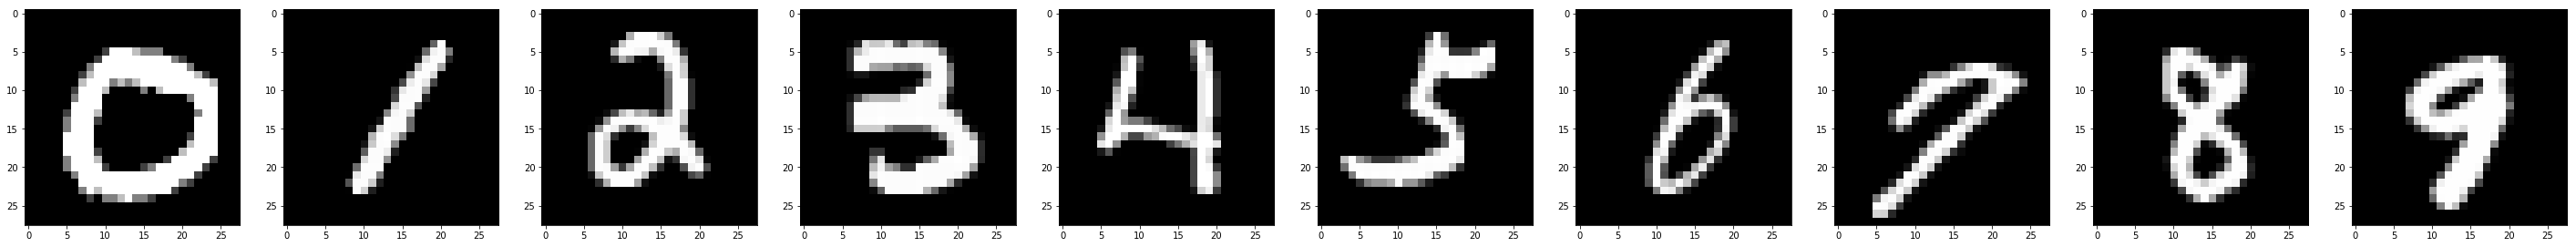

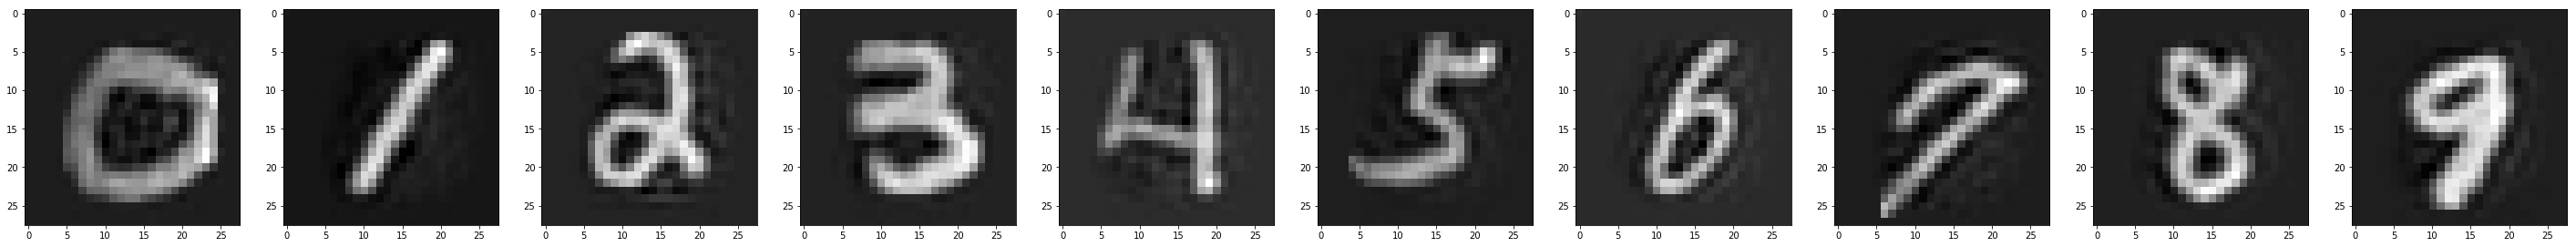

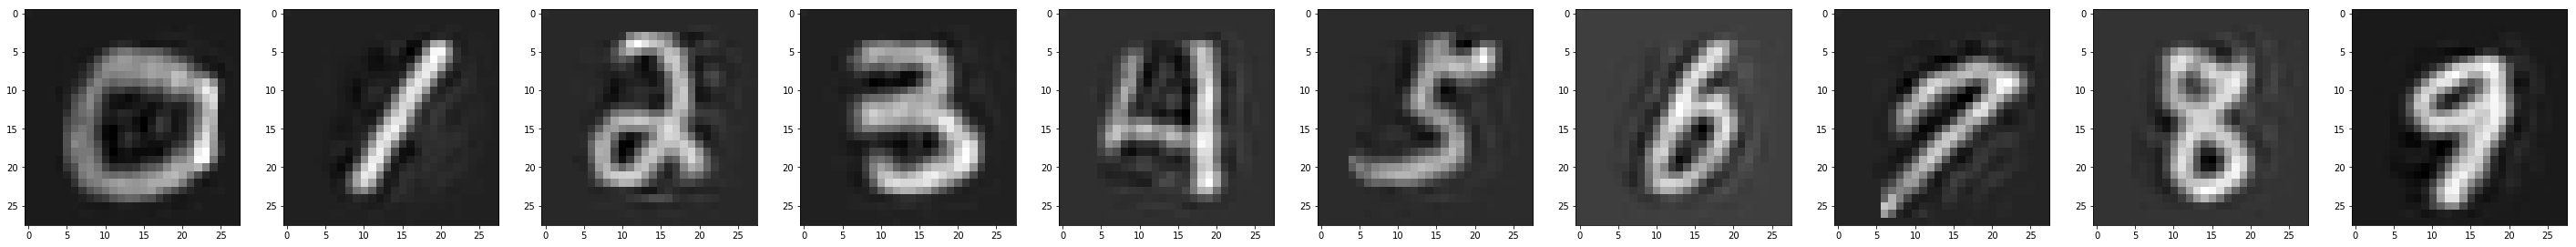

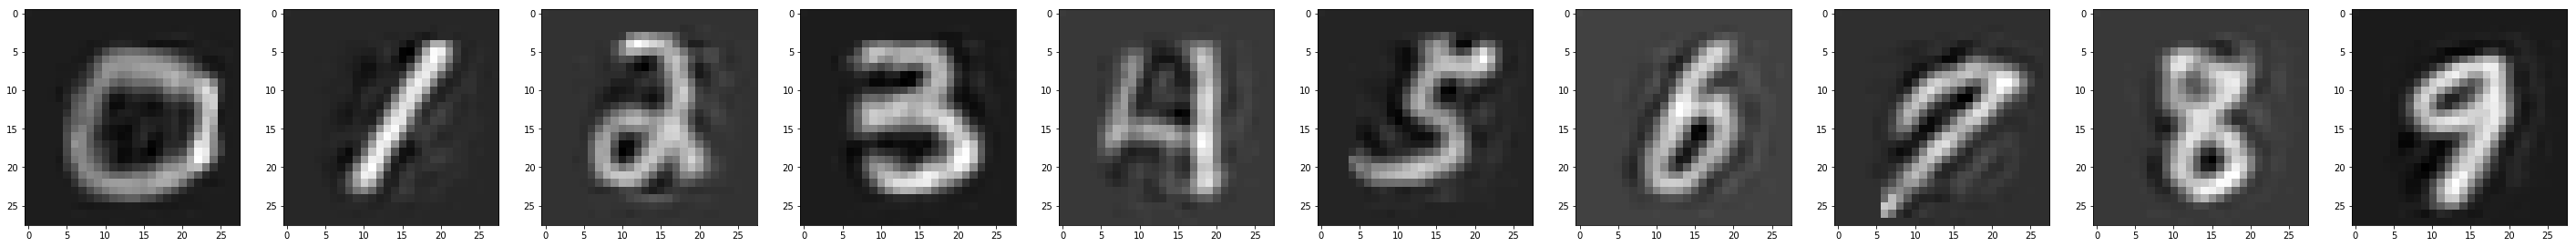

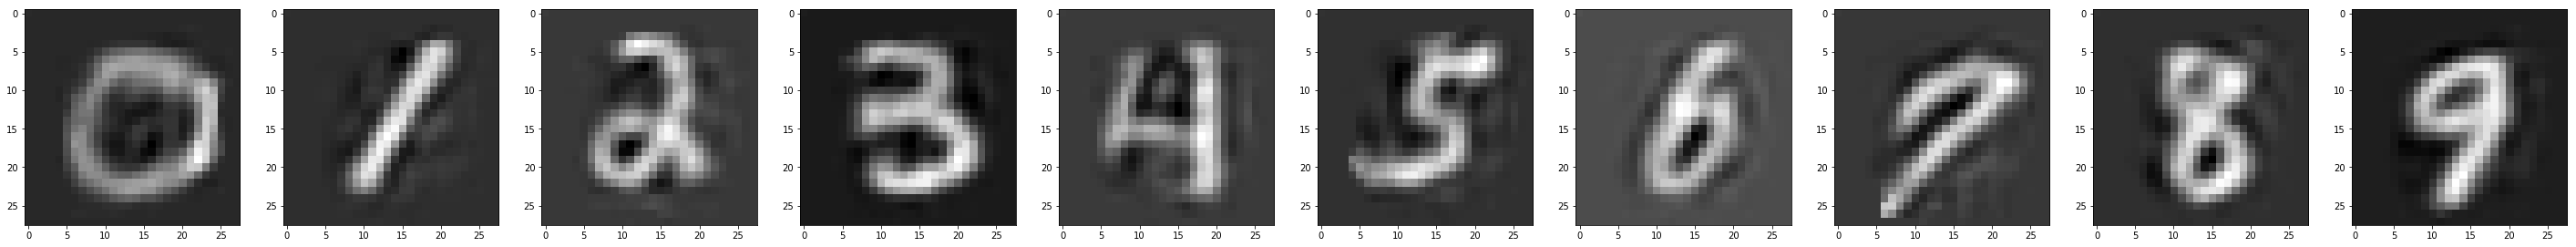

In [17]:
limits=[0.95,0.90,0.85,0.75]

#Original plot
fig,axes=plt.subplots(1,10,figsize=[50,5])
mean_test=df_test2.mean(axis=0)
std_test=df_test2.std(axis=0)
for idx in range(10):
    grid_data=df_test2[cols_test[1:]].iloc[idx*10].as_matrix().reshape(28,28)
    axes[idx].imshow(grid_data,interpolation=None,cmap='gray')
plt.show()



df=[]
#Stores the number of components required
no_of_comp=[]
j=0
for max_limit in limits:
    decoded_test,ans=pca_func(max_limit,df_train,df_test[cols_test[1:]])
    no_of_comp.append(ans)
    
    #Calculating rmse
    rmse=[0 for i in range(10)]
    for i in range(10):
        for j in range(10):
            rmse[j]+=np.sqrt(mse(decoded_test.iloc[j+i*10],df_test[cols_test[1:]].iloc[j+i*10]))/10
    df.append(rmse)

    #Decoded testing data with max_limit as the variance taken into consideration
    decoded_test=destandardize(decoded_test,mean_test,std_test)
    fig,axes=plt.subplots(1,10,figsize=[50,5])
    for idx in range(10):
        grid_data=decoded_test.iloc[idx*10].as_matrix().reshape(28,28)
        axes[idx].imshow(grid_data,interpolation=None,cmap='gray')
    plt.show()
    



## Number of Components required for given variance limit (Part of Q2)

In [18]:
for i in range(len(no_of_comp)):
    print(no_of_comp[i][0])
    print()

Percentage limit: 95.0
Number of components: 331

Percentage limit: 90.0
Number of components: 236

Percentage limit: 85.0
Number of components: 185

Percentage limit: 75.0
Number of components: 120



## RMSE for all 10 digits in the 4 categories (Q5)

In [19]:
lim=[str(limits[i]*100)+'% variance'  for i in range(len(limits))]
table=pd.DataFrame(np.array(df).transpose(),columns=lim)
table

,95.0% variance,90.0% variance,85.0% variance,75.0% variance
0,0.208142,0.274055,0.317282,0.369694
1,0.194507,0.257033,0.301514,0.363702
2,0.183368,0.247136,0.290320,0.341339
3,0.175464,0.230589,0.271414,0.314559
4,0.210962,0.271594,0.309839,0.364881
5,0.193258,0.251710,0.292489,0.350413
6,0.195859,0.263296,0.309925,0.374809
7,0.192489,0.250972,0.299187,0.362663
8,0.158922,0.211013,0.251338,0.299961
9,0.199755,0.262194,0.309208,0.374692


#### We can observe from the above two results that the number of components required for accommodating greater variance is high and the corresponding RMSE thereby reduces. 